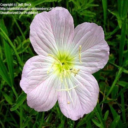

In [2]:
import torchvision
import torch
from PIL import Image

size = (128, 128)
transform = torchvision.transforms.Compose([torchvision.transforms.Resize(size), torchvision.transforms.ToTensor()])
train_dataset = list(torchvision.datasets.Flowers102("./../flowers", "train", transform=transform, download=True))
test_dataset = list(torchvision.datasets.Flowers102("./../flowers", "test", transform=transform, download=True))

def visualize_image(img: torch.Tensor) -> Image.Image:
    return Image.fromarray((img.permute(1, 2, 0) * 255).to(torch.uint8).numpy())
visualize_image(train_dataset[1][0])

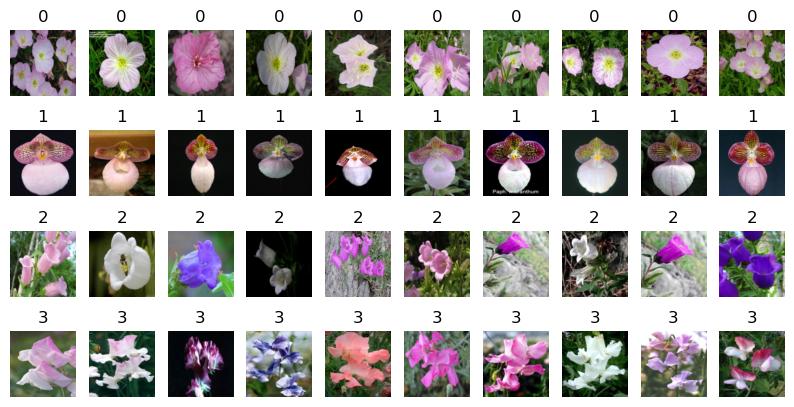

In [3]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(4, 10, figsize=(10, 5))
for i, (im, l) in enumerate(list(train_dataset)[:40]):
    ax[i // 10, i % 10].imshow(visualize_image(im))
    ax[i // 10, i % 10].set_title(l)
    ax[i // 10, i % 10].axis('off')

In [4]:
train_images = torch.stack([im for im, _ in train_dataset], dim=0).to("mps")
train_label = torch.tensor([label for _, label in train_dataset]).to("mps")

In [27]:
model = torch.nn.Linear(128 * 128 * 3, 102).to("mps")

batch_size = 32

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0002, momentum=0.9)

for epoch in range(10):
    avg_loss = []
    for i in range(0, len(train_images), batch_size):
        out = model(train_images[i:i+batch_size].view(-1, 128 * 128 * 3))

        optimizer.zero_grad()
        loss_val = loss(out, train_label[i:i+batch_size])
        loss_val.backward()
        optimizer.step()
        avg_loss.append(float(loss_val))

    print(f"Epoch {epoch} loss: {sum(avg_loss) / len(avg_loss)}")

Epoch 0 loss: 5.72487236559391
Epoch 1 loss: 5.834882467985153
Epoch 2 loss: 5.39578241109848
Epoch 3 loss: 5.195920675992966
Epoch 4 loss: 4.953670889139175
Epoch 5 loss: 4.7581882774829865
Epoch 6 loss: 4.564249187707901
Epoch 7 loss: 4.3892910704016685
Epoch 8 loss: 4.219952590763569
Epoch 9 loss: 4.061493463814259
